::##Numpy

Numpy를 사용하려면 먼저`numpy` 패키지를 가져와야 합니다.

In [39]:
import numpy as np

###Arrays

Python 리스트를 통해서 numpy 배열을 초기화하고 대괄호\[, \]를 사용하여 요소에 액세스 할 수 있습니다.

In [40]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [41]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [42]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy는 또한 배열을 만드는 다양한 방법을 제공합니다.

In [43]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [44]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [45]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.76112178 0.32182101]
 [0.24196823 0.56288868]]


##Lecture 2: 실습



우리는 강의에서 설명한 간단한 선형분류기 예시를 직접 코딩하는 실습을 진행한다. 계산 편의상 b (bias)는 제외하고 문제풀이를 진행한다. 본 실습에서 사용하는 분류기는 3가지의 클래스를 분류하며, 각 클래스에 속한 데이터는 다음과 같은 값을 갖고있다고 가정한다.

Cat = [[56, 231], [24, 1]]

Dog = [[120, 30], [24, 0]]

Ship = [[20, 31], [240, 100]]



### 1단계

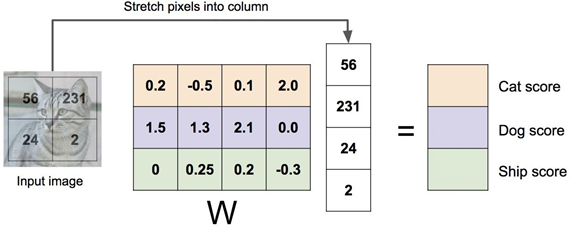


위 예시는 W를 이용하여 Input image를 3가지 클래스로 분류하고 있다. 위 Cat/Dog/Ship에 대한 선형분류기의 score를 아래 두가지 방법을 통해 계산하시오.

1) 손으로 직접 풀어서 각 score를 계산한다.

2) Numpy array로 수를 입력 한 후 값을 계산하여 출력한다.

##1) 직접 계산하기
**1-1) Cat**</br>

1-1-1) cat_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
0.2 & -0.5 & 0.1 & 2.0
\end{bmatrix} *
\begin{bmatrix}
56 \\
231 \\
24 \\
1 \\
\end{bmatrix}  = -99.9
\end{align}
$$
1-1-2) dog_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
1.5 & 1.3 & 2.1 & 0.0
\end{bmatrix} *
\begin{bmatrix}
56 \\
231 \\
24 \\
1 \\
\end{bmatrix} = 434.7
\end{align}
$$
1-1-3) ship_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
0.0 & 0.25 & 0.2 & -0.3
\end{bmatrix} *
\begin{bmatrix}
56 \\
231 \\
24 \\
1 \\
\end{bmatrix} = 62.25
\end{align}
$$
</br>
**1-2) Dog score**
</br>

1-2-1) cat_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
0.2 & -0.5 & 0.1 & 2.0
\end{bmatrix} *
\begin{bmatrix}
120 \\
30 \\
24 \\
0 \\
\end{bmatrix} = 11.4
\end{align}
$$
1-2-2) dog_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
1.5 & 1.3 & 2.1 & 0.0
\end{bmatrix} *
\begin{bmatrix}
120 \\
30 \\
24 \\
0 \\
\end{bmatrix}= 269.4
\end{align}
$$
1-2-3) ship_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
0.0 & 0.25 & 0.2 & -0.3
\end{bmatrix} *
\begin{bmatrix}
120 \\
30 \\
24 \\
0 \\
\end{bmatrix} = 12.3
\end{align}
$$
**1-3) Ship score**

1-3-1) cat_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
0.2 & -0.5 & 0.1 & 2.0
\end{bmatrix} *
\begin{bmatrix}
20 \\
31 \\
240 \\
100 \\
\end{bmatrix} = 212.5
\end{align}
$$
1-3-2) dog_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
1.5 & 1.3 & 2.1 & 0.0
\end{bmatrix} *
\begin{bmatrix}
20 \\
31 \\
240 \\
100 \\
\end{bmatrix}= 574.3
\end{align}
$$
1-3-3) ship_score
$$ \begin{align}
W * Cat = \begin{bmatrix}
0.0 & 0.25 & 0.2 & -0.3
\end{bmatrix} *
\begin{bmatrix}
20 \\
31 \\
240 \\
100 \\
\end{bmatrix} = 25.75
\end{align}
$$

In [46]:
import numpy as np

### 코드를 적으시오.
W = np.array([[0.2, -0.5, 0.1, 2.0],[1.5, 1.3, 2.1, 0.0], [0.0, 0.25, 0.2, -0.3]])
x_1 = np.array([[56, 231], [24, 1]])   # Image_cat
x_2 = np.array([[120, 30], [24, 0]])   # Image_dog
x_3 = np.array([[20, 31], [240, 100]])   # Image_ship


print('클래스 별 스코어 출력')

### 코드를 적으시오.
# 클래스 별 score 계산
# 힌트: np.matmul()과 np.flatten() 이용
print('Cat score: ', np.matmul(W, x_1.flatten())) #3개다 cat으로 테스트한 결과
print('Dog score: ', np.matmul(W, x_2.flatten())) #3개다 dog으로 테스트한 결과
print('Ship score: ', np.matmul(W, x_3.flatten())) #3개다 ship으로 테스트한 결과

클래스 별 스코어 출력
Cat score:  [-99.9  434.7   62.25]
Dog score:  [ 11.4 269.4  12.3]
Ship score:  [212.5  574.3   25.75]


## 2 단계: 머리와 손으로 하는 Linear classifier 학습

선형분류기는 입력데이터의 클래스에 대하여 최대값을 출력하도록 학습(W 값을 변경)한다. 위에서 구한 이미지 별 클래스 점수가 최대가 되도록 W를 조금 씩 바꿔보시오.


In [47]:
# 목표: 각 이미지의 클래스에 해당하는 점수가 최대가 되도록 W를 바꾼다.
### 코드를 적으시오.
W = np.array([[-3.2, 7.5, 0.2, 0.1],
 [8.8, -6.3, -0.1, -4.7],
 [0.0, 0.25, 3.2, 4.9]])

print('클래스 별 스코어 출력')
### 코드를 적으시오.
print('               cat   dog    ship')
print('Cat score: ', np.matmul(W, x_1.flatten())) #3개다 cat으로 테스트한 결과
print('Dog score: ', np.matmul(W, x_2.flatten())) #3개다 dog으로 테스트한 결과
print('Ship score: ', np.matmul(W, x_3.flatten())) #3개다 ship으로 테스트한 결과

클래스 별 스코어 출력
               cat   dog    ship
Cat score:  [1558.2  -969.6   139.45]
Dog score:  [-154.2  864.6   84.3]
Ship score:  [ 226.5  -513.3  1265.75]


## 3 단계: Linear Classifier + Softmax

Softmax function은 Linear classifier의 기본 출력을 확률의 형태로 정규화 하는 역할을 수행한다. 이를 통해 출력의 확률의 합 ($\sum_iP(Y=y_i | X=x_i)$)이 1이 되게 한다.  이는 one-hot encoding형태의 Label과 1:1로 비교하기 쉬운 형태가 되며, 후에 Cross-entrophy loss와 결합하여 편리한 학습이 가능토록 한다.

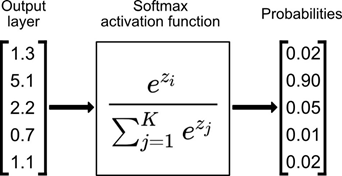


In [48]:
# original softmax function: 지수로그 표현에 문제 있음
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0)

# softmax function: np.exp에 너무 큰값이 들어가지 않도록 수정
def softmax_fixed(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

### 코드를 적으시오.
z_1 = np.matmul(W, x_1.flatten())
z_2 = np.matmul(W, x_2.flatten())
z_3 = np.matmul(W, x_3.flatten())

p_1 = softmax_fixed(z_1)
p_2 = softmax_fixed(z_2)
p_3 = softmax_fixed(z_3)

In [49]:
print(p_1)
print(p_2)
print(p_3)

[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]


##4단계: Label 정의 및 Loss 계산

원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이다. 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)라고 한다.

예를들어 우리가 가진 문제의 클래스 집합의 크기는 3이며, Cat은 클래스 1번 인덱스를 갖으므로 cat label의 one-hot vector는 [1, 0, 0]이 된다.


In [50]:
# one-hot vector 정의하기

### 코드를 적으시오.
y_1 = np.array([1,0,0])   #label_cat
y_2 = np.array([0,1,0])   #label_dog
y_3 = np.array([0,0,1])   #label_ship

print(type(p_1))

<class 'numpy.ndarray'>


#프로그래밍 과제 1.

Loss function은 학습하려는 데이터셋의 예시들에 대한 평균적인 loss로 정의한다.
여기서 우리는 가장 간단한 형태의 손실함수인 L1Loss를 사용한다.


\begin{align}
Loss = \frac{1}{N}\sum_i^N||\hat{y}_i - y_i||_1
\end{align}


여기서 $\hat{y}_i$과 $y_i$는  $i$번째 입력 데이터에 따른 예측확률과 정답 레이블을 나타내는 벡터를 각각 뜻한다. $||x||_1$는 길이 $M$을 가진 벡터 $x$의 L1 Norm으로, 다음과 같은 절대값을 통해 계산한다.

\begin{align}
||x||_1 = \sum_j^M|x_j| = |x_1| + |x_2| + ... + |x_M|
\end{align}



위 예측 결과에 따른 Loss를 계산하도록 함수를 구현하시오. 여러분이 선형분류기를 성공적으로 학습하였다면 Loss 계산 결과는 0에 매우 근접해야 한다.
손으로 $W$값을 일일히 바꾸면서 진행하시오.


In [51]:
# Image_cat = [56, 231, 24, 1]
# Image_dog = [120, 30, 24, 0]
# Image_ship = [20, 31, 240, 100]
W = np.array([[-3.2, 7.5, 0.2, 0.1],
 [8.8, -6.3, -0.1, -4.7],
 [0.0, 0.25, 3.2, 4.9]])

In [52]:
# L1Loss 구현
def L1Loss(predictions, labels):

    ####################################
    ##### 이곳에 코드를 작성하시오 #####
    loss = 0

    for i in range(len(predictions)):
        prediction = predictions[i]
        label = labels[i]
        loss += np.sum(np.abs(prediction - label))
    ####################################

    return loss/len(predictions)

# L1Loss 계산 값을 출력하시오.
# 구현이 옳고 학습도 잘되었다면 출력값은 0이 되어야한다.
P = [p_1, p_2, p_3]
Y = [y_1, y_2, y_3]

print(L1Loss(P, Y))

0.0


## 과제 평가 및 기한

- 모든 실습 과제는 실습시간에 구두 테스트를 통해 평가합니다. 수업 중 지정된 시간안에 문제를 제출한 경우 실습 점수 만점을 받게 됩니다. 실습 시간 내 내용을 소화하기 어려운 경우 동영상 강의와 함께 철저한 예습을 병행해야 합니다.
- 수업 시간에 과제를 다 해결 못한 학생은 조교가 진행하는 보강시간에 문제풀이를 함께 진행하게 됩니다. 이 경우 50%의 실습 점수를 드립니다.
